In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Iniciamos exploración de cohortes

In [10]:
import pandas as pd

# Cargar los datos desde los archivos CSV
payments = pd.read_csv("./project_dataset/extract-cash-request-data-analyst.csv")
fees = pd.read_csv("./project_dataset/extract-fees-data-analyst.csv")

# Convertir la columna de fechas a tipo datetime
payments['created_at'] = pd.to_datetime(payments['created_at'])

# Extraer el año y el mes de la fecha de creación
payments['year_month'] = payments['created_at'].dt.to_period('M')


/var/folders/7c/3smlgk813_l8xy5r_2zy0trr0000gn/T/ipykernel_70276/544008279.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  payments['year_month'] = payments['created_at'].dt.to_period('M')


In [21]:
# Encontrar la fecha de la primera operación para cada usuario por año y mes
first_operation = payments.groupby('user_id')['year_month'].min().reset_index()
first_operation.columns = ['user_id', 'first_operation_month']
first_operation.head(20)

,user_id,first_operation_month
0,34.0,2020-04
1,35.0,2019-12
2,47.0,2019-11
3,52.0,2019-12
4,53.0,2019-12
5,66.0,2020-04
6,68.0,2019-12
7,70.0,2020-04
8,72.0,2020-01
9,73.0,2020-01


In [22]:
# Agrupar por la fecha de la primera operación por mes y contar el número de usuarios
cohort_data = first_operation.groupby('first_operation_month').agg({'user_id': 'count'}).reset_index()
cohort_data.columns = ['cohort_month', 'num_users']

print(cohort_data.head(20))
print(cohort_data.describe())




   cohort_month  num_users
0       2019-11          1
1       2019-12        204
2       2020-01         90
3       2020-02         84
4       2020-03         69
5       2020-04        212
6       2020-05        369
7       2020-06       1338
8       2020-07       1294
9       2020-08        656
10      2020-09       1712
11      2020-10       4694
12      2020-11         75
         num_users
count    13.000000
mean    830.615385
std    1295.468869
min       1.000000
25%      84.000000
50%     212.000000
75%    1294.000000
max    4694.000000


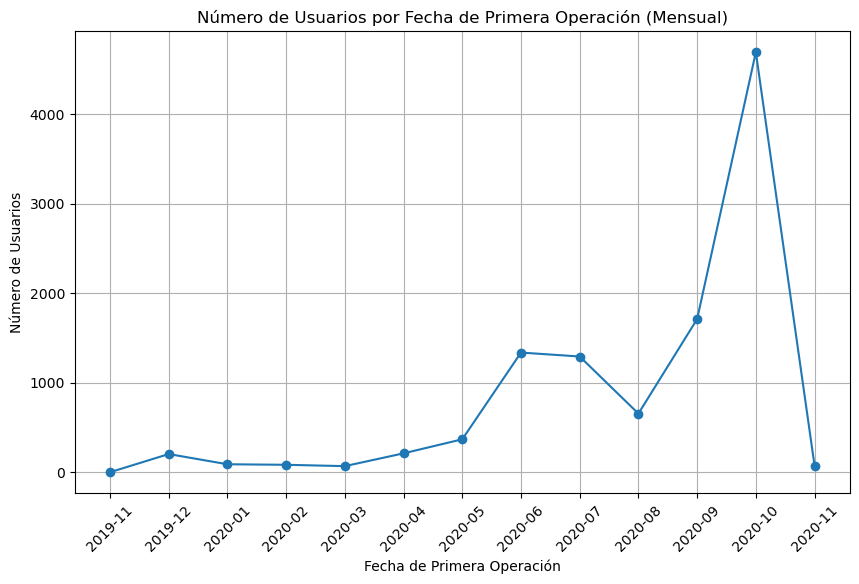

In [23]:
# Crear una gráfica de líneas para visualizar el número de usuarios por cohorte mensual
plt.figure(figsize=(10, 6))
plt.plot(cohort_data['cohort_month'].astype(str), cohort_data['num_users'], marker='o')
plt.title('Número de Usuarios por Fecha de Primera Operación (Mensual)')
plt.xlabel('Fecha de Primera Operación')
plt.ylabel('Número de Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


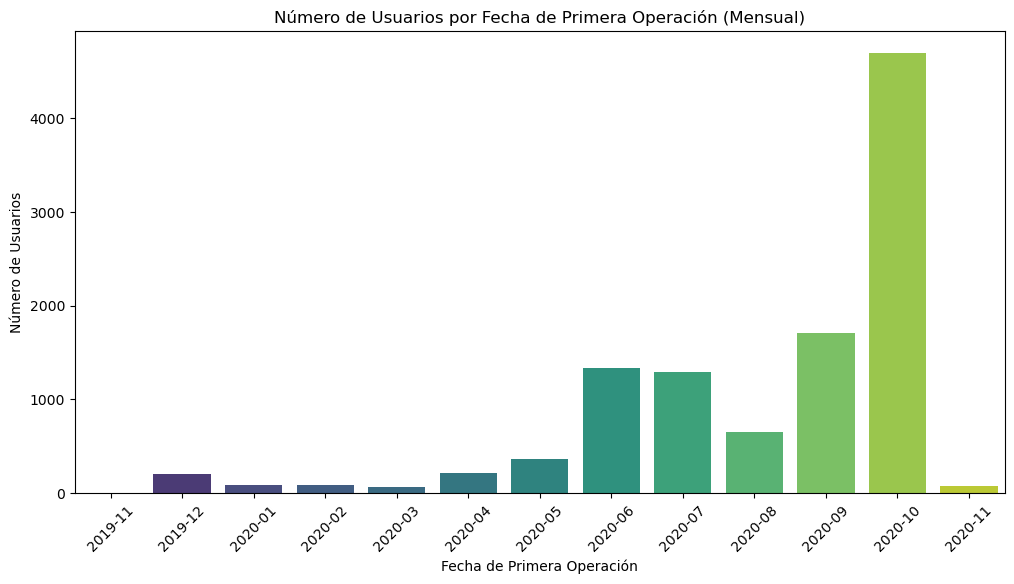

In [24]:
# Crear un gráfico de barras para visualizar el número de usuarios por cohorte mensual
plt.figure(figsize=(12, 6))
sns.barplot(x='cohort_month', y='num_users', data=cohort_data, palette='viridis')
plt.title('Número de Usuarios por Fecha de Primera Operación (Mensual)')
plt.xlabel('Fecha de Primera Operación')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45)
plt.show()
